# Sales Prediction
Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection. In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

## Dataset: https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [1]:
#We begin with importing all the necessary libraries
#For Data Analysis
import numpy as np
import pandas as pd
#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#For Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Devesh jain\OneDrive\Desktop\datsets\Sales-Dataset.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Exploratory Data Analysis

In [3]:
data.shape

(200, 4)

In [4]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.duplicated().sum()

0

# Data Visualization

<Axes: >

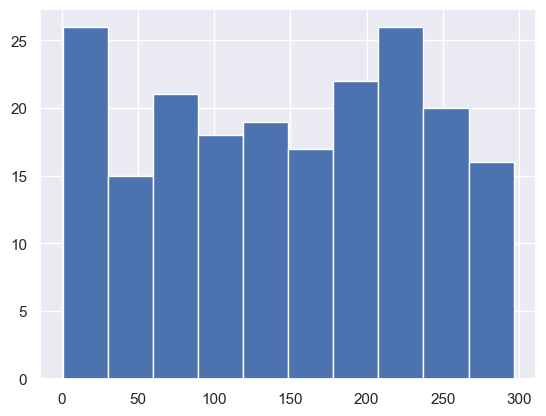

In [10]:
sns.set()
data["TV"].hist()

<Axes: >

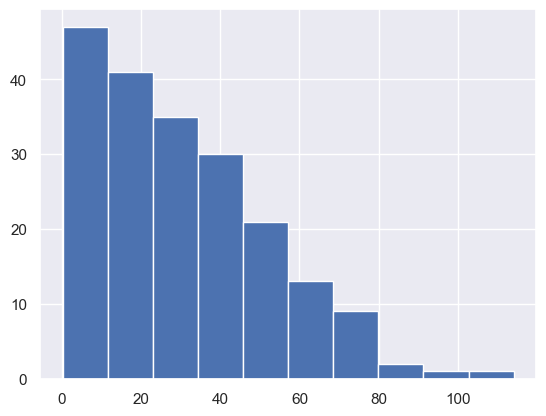

In [11]:
data["Newspaper"].hist()

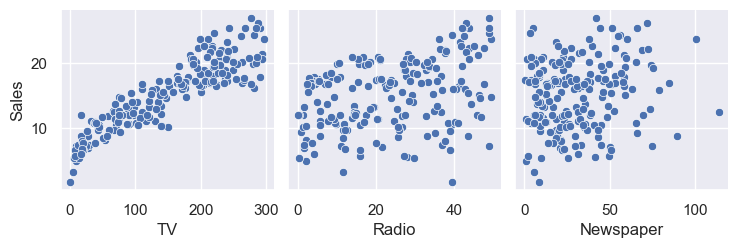

In [14]:
sns.pairplot(data, x_vars = ["TV", "Radio", "Newspaper"], y_vars = 'Sales', kind = "scatter")

<Axes: >

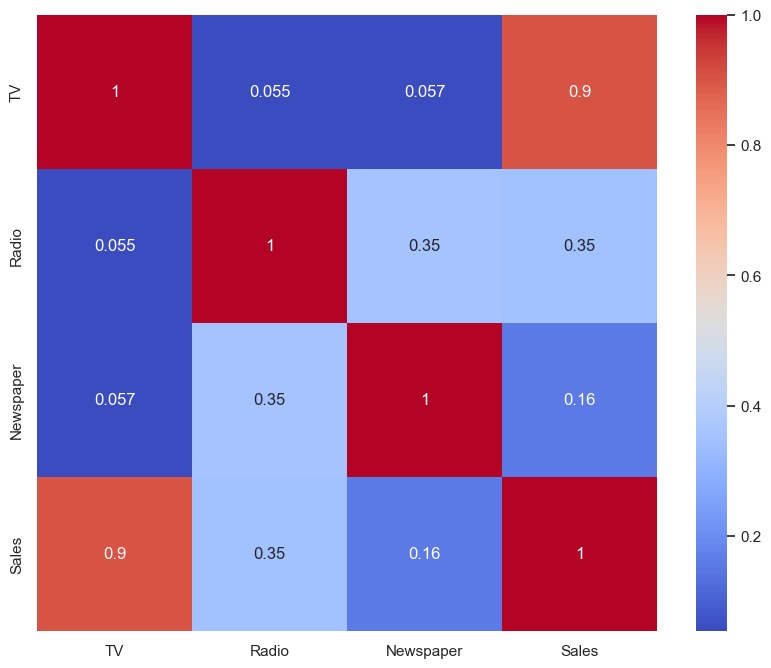

In [15]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap = "coolwarm")

# Data Preparation

In [16]:
X = data.drop(columns = "Sales")
Y = data["Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# Model Building

In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [18]:
Y_pred = model.predict(X_test)

In [19]:
model.intercept_

4.743766701589687

In [20]:
model.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [21]:
accuracy_score = model.score(X_test,Y_test)*100
accuracy_score

90.914843418498

# Line of Best Fit

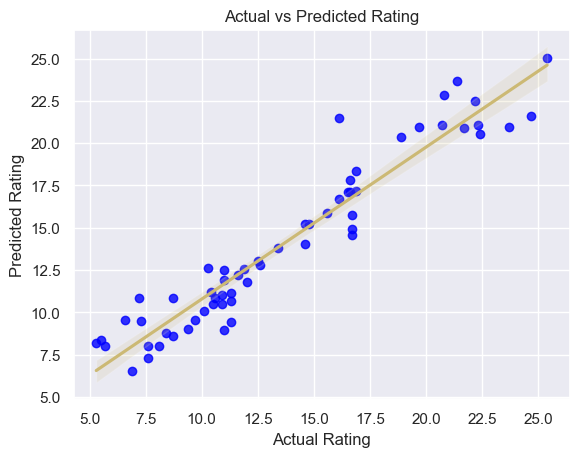

In [22]:
sns.regplot(x = Y_test, y = Y_pred, line_kws = dict(color = "y"), scatter_kws = dict(color = "blue"))
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()

# Model Evaluation

In [23]:
mse = mean_squared_error(Y_pred, Y_test)
print("Mean Square Error:", round(mse, 2))

Mean Square Error: 2.54


In [24]:
score = r2_score(Y_pred, Y_test)
print("R2 Score:", round(score, 2))

R2 Score: 0.9


# Thank You!!!